In [1]:
import csv
import os
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Cropping2D

#from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [8]:
lines = []
images = []
measurements = []
with open('data_download/driving_log.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for line in reader:
        lines.append(line)

In [9]:
for line in lines:
    for i in range(3):
        source_path = line[i]
        filename = source_path.split('/')[-1]
        current_path = 'data_download/IMG/' + filename
        image = cv2.imread(current_path)
        images.append(image)
        measurement = float(line[3])
        measurements.append(measurement)

In [10]:
print(np.shape(lines))
print(np.shape(images))
print(np.shape(measurements))

(8036, 7)
(24108, 160, 320, 3)
(24108,)


In [11]:
image = cv2.imread(current_path)

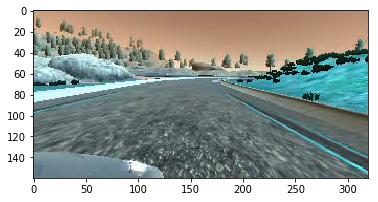

In [13]:
plt.imshow(image)
plt.show()

In [15]:
X_train = np.array(images)
y_train = np.array(measurements)

model = Sequential()
model.add(Lambda(lambda  x: x / 255.0 - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((75,25), (0,0))))
model.add(Flatten(input_shape=(160,320,3)))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=7)
model.save('model.h5')

c:\program files\python36\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 19286 samples, validate on 4822 samples
Epoch 1/7
19286/19286 [==============================] - 40s - loss: 0.1679 - val_loss: 0.0713
Epoch 2/7
19286/19286 [==============================] - 30s - loss: 0.2625 - val_loss: 0.2593
Epoch 3/7
19286/19286 [==============================] - 25s - loss: 0.1890 - val_loss: 0.1377
Epoch 4/7
19286/19286 [==============================] - 23s - loss: 0.3743 - val_loss: 0.3092
Epoch 5/7
19286/19286 [==============================] - 24s - loss: 0.1971 - val_loss: 0.1473s: 0.1
Epoch 6/7
19286/19286 [==============================] - 37s - loss: 0.2235 - val_loss: 0.1722
Epoch 7/7
19286/19286 [==============================] - 30s - loss: 0.2434 - val_loss: 0.1880
